<a href="https://colab.research.google.com/github/thfruchart/1nsi-2020/blob/master/Chap12/COURS_Trier_un_tableau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trier un tableau

Dans ce chapitre, on va travailler avec des tableaux de dimension 1 (type list en Python), contenant des valeurs comparables entre elles.
* soit des tableaux de valeurs numériques (`int` ou `float`)
* soit des tableaux de chaînes de caractères (`str`)

On rappelle qu'en Python : `'A' < 'B'` est évalué à `True`

In [ ]:
'A'<'B'

True

In [ ]:
'a'<'B'

False

In [ ]:
'ABC' < 'AS'

True

Trier un tableau **en place** consiste à modifier les cellules du tableau afin d'obtenir à la fin un tableau **trié**. 

Dans tout le chapitre, on triera les tableaux par ordre **croissant**.

Pour le type `str`, l'ordre croissant correspond le plus souvent à l'ordre **alphabétique** (attention cependant à la casse : majuscule/minuscule, et aux caractères accentués). 

#### On a déjà écrit une fonction qui permet de **tester si un tableau est trié** : 

In [ ]:
def est_croissant(t):
    ''' t est un tableau dont les valeurs sont toutes comparables entre elles
    la fonction renvoie True si t est trié par ordre croissant, et False sinon'''
    
    for i in range(len(t)-1):
        if t[i] > t[i+1]: # deux valeurs sont "mal rangées"
            return False
    return True 

In [ ]:
est_croissant( [10,20,30] )

True

In [ ]:
est_croissant( ['A','B','C'] )

True

In [ ]:
est_croissant( ['a','B','C'])

False

#### rappel : slice (tranche) extrait d'un tableau

On utilisera ces notations pour justifier la correction du programme. 

In [ ]:
t = [0,11,22,33,44,55,66,77]

In [ ]:
t[0]

0

In [ ]:
t[6]

66

In [ ]:
t[2:4]

[22, 33]

In [ ]:
t[3:len(t)]

[33, 44, 55, 66, 77]

In [ ]:
t[0:3]

[0, 11, 22]

In [ ]:
t[4:]

[44, 55, 66, 77]

In [ ]:
t[:4]

[0, 11, 22, 33]

# Tri par sélection

Principe du tri par sélection d'un tableau t.

on parcourt le tableau t avec une boucle `for`

* la valeur minimale du tableau `t` sera placée à l'indice 0
* ensuite, la valeur minimale de `t[1:len(t)]` sera placée à l'indice 1
* etc...
* à chaque étape, la valeur minimale du tableau `t[i:len(t)]` sera placée à l'indice `i`. 

```
  t = [ éléments triés  | éléments plus grands non encore triés ]
indice 0   ...            i 
```



In [ ]:
def tri_par_selection(t):
    for i in range(len(t)):
        i_min = i # recherche de l'indice du minimum du tableau t[i:len(t)]
        for k in range(i, len(t)):
            if t[i_min] > t[k] :
                i_min = k
        t[i], t[i_min] = t[i_min], t[i] # échange des valeurs d'indice i et i_min dans le tableau t
    return t

Quelques essais

In [ ]:
tri_par_selection( [20,50,30,40,60,10] )

[10, 20, 30, 40, 50, 60]

## [Activité](https://github.com/thfruchart/1nsi-2020/blob/master/Chap12/Tri_par_selection_Activit%C3%A9.pdf)

## Invariants de boucle

### boucle sur k

In [ ]:
def tri_par_selection(t):
    for i in range(len(t)-1):
        i_min = i 
        for k in range(i+1, len(t)):
            # i_min est l'indice du minimum du tableau t[i:k] entre les indices i (inclus) et k (exclu)
            if t[i_min] > t[k] :
                i_min = k
            # i_min est l'indice du minimum du tableau t[i:k+1] entre les indices i (inclus) et k (inclu)
        t[i], t[i_min] = t[i_min], t[i] 
    return t

### boucle sur i

In [ ]:
def tri_par_selection(t):
    for i in range(len(t)-1): 
        # t[0:i] est trié et ses valeurs sont inférieurs ou égales à celles de t[i:]
        i_min = i 
        for k in range(i+1, len(t)):
            if t[i_min] > t[k] :
                i_min = k
        t[i], t[i_min] = t[i_min], t[i] 
    return t

## Efficacité

#### Pour tester l'efficacité du tri par selection, on effectue de tri sur des tableaux de plus en plus grands. 

On va mesurer le temps d'exécution avec le programme suivant : 

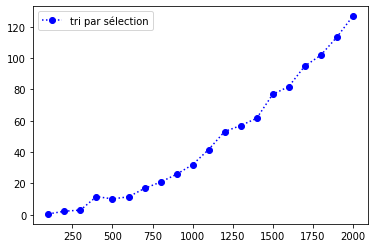

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from random import random

def chrono_tri_sur_taille(n):
    ''' renvoie le temps (en milliseconde) d'exécution du tri par selection
    sur un tableau aléatoire de 'n' nombres flottants'''
    t = [random() for i in range(n)]
    start = perf_counter()
    tri_par_selection(t)
    stop = perf_counter()
    return 1000*(stop - start)

# Tri sur des tableaux de taille 100, 200, ... 2000
abs = []
ord = []
for n in range(100,2001,100):
    abs.append(n)
    ord.append(chrono_tri_sur_taille(n))
# graphique
x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(np.array(abs), np.array(ord),  "b:o",label="tri par sélection")
plt.legend()
plt.show() # affiche la figure a l'ecran

#### Comparaison avec une fonction de référence

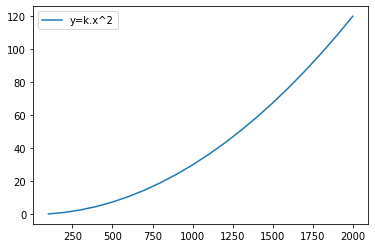

In [ ]:
abs = []
ord = []
k = 1*120/(4e6)
for n in range(100,2001,100):
    abs.append(n)
    ord.append(k* n**2)
# graphique
x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(np.array(abs), np.array(ord),label="y=k.x^2")
plt.legend()
plt.show() # affiche la figure a l'ecran

#### Synthèse

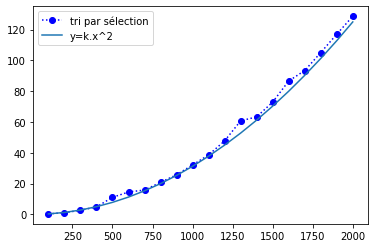

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from random import random

def chrono_tri_sur_taille(n):
    ''' renvoie le temps (en milliseconde) d'exécution du tri par selection
    sur un tableau aléatoire de 'n' nombres flottants'''
    t = [random() for i in range(n)]
    start = perf_counter()
    tri_par_selection(t)
    stop = perf_counter()
    return 1000*(stop - start)

# Tri sur des tableaux de taille 100, 200, ... 1000
abs = []
ord = []
for n in range(100,2001,100):
    abs.append(n)
    ord.append(chrono_tri_sur_taille(n))
# graphique
x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(np.array(abs), np.array(ord),  "b:o",label="tri par sélection")

# fonction carrée (k.x^2)
abs = []
ord = []
k = 125/(4e6)
for n in range(100,2001,100):
    abs.append(n)
    ord.append(k* n**2)
plt.plot(np.array(abs), np.array(ord),label="y=k.x^2")
plt.legend()
plt.show() # affiche la figure a l'ecran

On dit que la complexité du tri par sélection est **quadratique**

# Tri par insertion

On commence par définir une fonction d'insertion

In [2]:
def insere(t,v,i):
    ''' insère la valeur 'v' dans le tableau 't'
    le plus à gauche possible à partir de l'indice 'i'  '''
    assert i<len(t)
    while i>0 and v<t[i-1]:
        t[i]=t[i-1]
        i = i-1
    t[i] = v
    return t

In [ ]:
insere([10,20,30,40,0,0,0,0],25,4)

[10, 20, 25, 30, 40, 0, 0, 0]

[Visualiser l'exécution sur PythonTutor](http://www.pythontutor.com/visualize.html#code=def%20insere%28t,v,i%29%3A%0A%20%20%20%20'''%20ins%C3%A8re%20la%20valeur%20'v'%20dans%20le%20tableau%20't'%0A%20%20%20%20le%20plus%20%C3%A0%20gauche%20possible%20%C3%A0%20partir%20de%20l'indice%20'i'%20%20'''%0A%20%20%20%20assert%20i%3Clen%28t%29%0A%20%20%20%20while%20i%3E0%20and%20v%3Ct%5Bi-1%5D%3A%0A%20%20%20%20%20%20%20%20t%5Bi%5D%3Dt%5Bi-1%5D%0A%20%20%20%20%20%20%20%20i%20%3D%20i-1%0A%20%20%20%20t%5Bi%5D%20%3D%20v%0A%20%20%20%20return%20t%0A%0Ainsere%28%5B10,20,30,40,0,0,0,0%5D,25,4%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

## [Activité : fonction `insere`](https://github.com/thfruchart/1nsi-2020/blob/master/Chap12/Tri_par_insertion_Activit%C3%A9.pdf) 

## Copie triée d'un tableau

In [ ]:
def tri_par_insertion_copie(t):
    ''' renvoie une copie du tableau t, contenant les valeurs triées par ordre croissant'''
    resu = [0] * len(t)
    for i in range(len(t)):
        v = t[i]
        insere(resu,v,i)
    return resu

In [ ]:
tab = [50,10,20,60,30,40]
print(tri_par_insertion_copie(tab))
print(tab)

## Tri en place d'un tableau

In [1]:
def tri_par_insertion(t):
    ''' tri du tableau t, par ordre croissant'''
    for i in range(len(t)):
        v = t[i]
        insere(t,v,i)
    return t

In [ ]:
tab = [50,10,20,60,30,40]
print(tri_par_insertion(tab))
print(tab)

## Efficacité

On peut tester l'efficacité du tri par insertion : 
1. dans le meilleur des cas 
2. en moyenne
3. dans le pire des cas

ici, nous allons évaluer l'efficacité dans chacun de ces cas, en exécutant la fonction : 
1. sur un tableau déjà trié de taille n
2. sur un tableau aléatoire de taille n
3. sur un tableau initialement trié en ordre décroissant

### Dans le meilleur des cas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from random import random

def chrono_tri_sur_taille(n):
    ''' renvoie le temps (en milliseconde) d'exécution du tri par selection
    sur un tableau aléatoire de 'n' nombres flottants'''
    t = [ i  for i in range(n)]
    start = perf_counter()
    tri_par_insertion(t)
    stop = perf_counter()
    return 1000*(stop - start)

# Tri sur des tableaux de taille 100, 200, ... 1000
abs = []
ord = []
for n in range(100,2001,100):
    abs.append(n)
    ord.append(chrono_tri_sur_taille(n))
# graphique
x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(np.array(abs), np.array(ord),  "b:o",label="tri par insertion")

# fonction linéaire (k.x)
abs = []
ord = []
k = 0.6/2000
for n in range(100,2001,100):
    abs.append(n)
    ord.append(k* n)
plt.plot(np.array(abs), np.array(ord),label="y=k.x")
plt.legend()
plt.show() # affiche la figure a l'ecran

On dit que la complexité du tri par insertion est **linéaire dans le meilleur des cas**

### En moyenne

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from random import random

def chrono_tri_sur_taille(n):
    ''' renvoie le temps (en milliseconde) d'exécution du tri par selection
    sur un tableau aléatoire de 'n' nombres flottants'''
    t = [random() for i in range(n)]
    start = perf_counter()
    tri_par_insertion(t)
    stop = perf_counter()
    return 1000*(stop - start)

# Tri sur des tableaux de taille 100, 200, ... 1000
abs = []
ord = []
for n in range(100,2001,100):
    abs.append(n)
    ord.append(chrono_tri_sur_taille(n))
# graphique
x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(np.array(abs), np.array(ord),  "b:o",label="tri par insertion")

# fonction carrée (k.x^2)
abs = []
ord = []
k = 175/2000**2
for n in range(100,2001,100):
    abs.append(n)
    ord.append(k* n**2)
plt.plot(np.array(abs), np.array(ord),label="y=k.x^2")
plt.legend()
plt.show() # affiche la figure a l'ecran

On dit que la complexité du tri par insertion est **quadratique en moyenne**

### Dans le pire des cas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from random import random

def chrono_tri_sur_taille(n):
    ''' renvoie le temps (en milliseconde) d'exécution du tri par selection
    sur un tableau aléatoire de 'n' nombres flottants'''
    t = [2000-i  for i in range(n)]
    start = perf_counter()
    tri_par_insertion(t)
    stop = perf_counter()
    return 1000*(stop - start)

# Tri sur des tableaux de taille 100, 200, ... 1000
abs = []
ord = []
for n in range(100,2001,100):
    abs.append(n)
    ord.append(chrono_tri_sur_taille(n))
# graphique
x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(np.array(abs), np.array(ord),  "b:o",label="tri par insertion")

# fonction carrée (k.x^2)
abs = []
ord = []
k = 310/2000**2
for n in range(100,2001,100):
    abs.append(n)
    ord.append(k* n**2)
plt.plot(np.array(abs), np.array(ord),label="y=k.x^2")
plt.legend()
plt.show() # affiche la figure a l'ecran

On dit que la complexité du tri par insertion est **quadratique dans le pire des cas**

# Synthèse




La complexité du tri par **sélection** est **quadratique** (dans tous les cas) 



La complexité du tri par **insertion** est : 

* **linéaire** dans le meilleur des cas (et donc meilleure que le tri par sélection)
* **quadratique** en moyenne, et dans le pire des cas (et donc comparable à celle du tri par sélection). 